In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set_style("white")

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
# get the value of percent
triples = pd.read_csv('triples.csv',names=['sub','verb','per'])
triples.head()

,,sub,verb,per
NaN,num,sub,verb,per
0.0,1,sale,rise,"11.4 %,"
1.0,4,decrease,follow,"4.5 %,"
2.0,5,manufacturer ' shipment,fall,"1.5 %,"
3.0,8,Questar,NaN,"53.4 %,"


In [5]:
rise_per = triples[triples.verb =='rise'].per
rise_per_list = list()
for i in rise_per.index:
    num = rise_per[i]
    num = num.replace(' %','').replace(' percent','').replace(',','').strip()
    num = float(num)
    if 0<num<100:
        rise_per_list.append(num)

In [6]:
min(rise_per_list), max(rise_per_list)

(0.01, 97.0)

In [7]:
fall_per = triples[triples.verb =='fall'].per
fall_per_list = list()
for i in fall_per.index:
    num = fall_per[i]
    num = num.replace(' %','').replace(' percent','').replace(',','').strip()
    num = float(num)
    if 0<num<100:
        fall_per_list.append(num)  

In [8]:
min(fall_per_list), max(fall_per_list)

(0.01, 99.0)

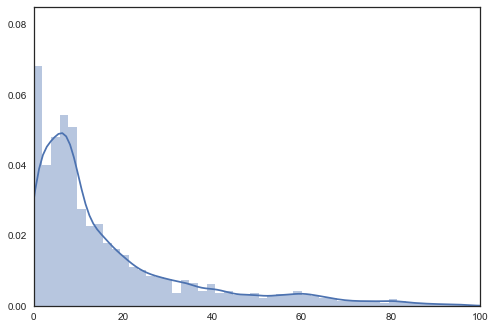

In [9]:
g = sns.distplot(rise_per_list)
g.set(xlim=[0,100], ylim=[0,0.085], yticks=[0,0.02,0.04,0.06,0.08])
plt.savefig('fig/likelihood_kde_rise.pdf')

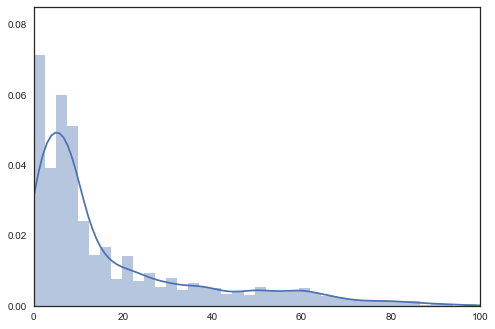

In [10]:
g = sns.distplot(fall_per_list)
g.set(xlim=[0,100], ylim=[0,0.085], yticks=[0,0.02,0.04,0.06,0.08])
plt.savefig('fig/likelihood_kde_fall.pdf')

C:\WinPython\python-3.5.3.amd64\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


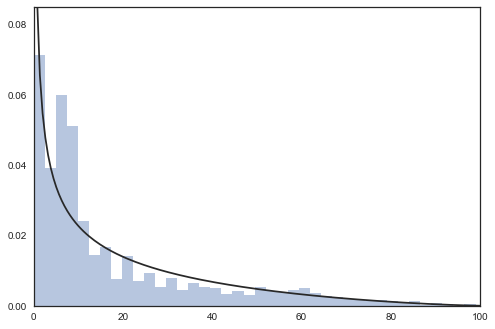

In [11]:
g = sns.distplot(fall_per_list, kde=False, fit=stats.beta)
g.set(xlim=[0,100], ylim=[0,0.085], yticks=[0,0.02,0.04,0.06,0.08])
plt.savefig('fig/likelihood_beta_fall.pdf')

C:\WinPython\python-3.5.3.amd64\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


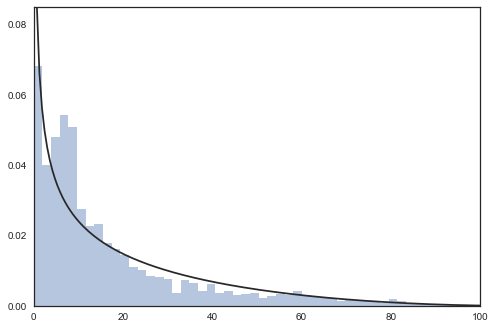

In [12]:
g = sns.distplot(rise_per_list, kde=False, fit=stats.beta)
g.set(xlim=[0,100], ylim=[0,0.085], yticks=[0,0.02,0.04,0.06,0.08])
plt.savefig('fig/likelihood_beta_rise.pdf')

In [13]:

stats.beta.fit(rise_per_list, floc=0, fscale=100)


(0.70038675155385133, 3.2147299793756416, 0, 100)

In [14]:
stats.beta.fit(fall_per_list, floc=0, fscale=100)

(0.64457210360592587, 2.8273093505598768, 0, 100)

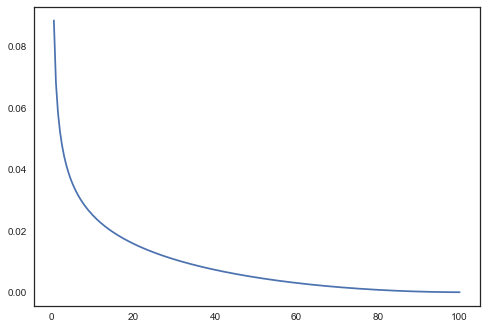

In [15]:
xs = np.linspace(0,100,200)
plt.plot(xs, stats.beta.pdf(xs, a=0.64, b=2.82, loc=0, scale=100))